# Import the necessary libraries

In [ ]:
pip install scikit-plot


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Read the DataFrames from CSV files

In [ ]:
reddit_data = pd.read_csv('Reddit_Data.csv')
twitter_data = pd.read_csv('Twitter_Data.csv')

# DataFrames Information

In [ ]:
 reddit_data

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
twitter_data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
reddit_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
twitter_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
#renaming the columns
twitter_data.columns=['messages','labels']
reddit_data.columns=['messages','labels']


In [ ]:
twitter_data.head()


,messages,labels
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
reddit_data.head()


,messages,labels
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


# Merge DataFrames


In [ ]:
data = pd.concat([twitter_data, reddit_data], ignore_index = True)


In [ ]:
data

,messages,labels
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
200224,jesus,0.0
200225,kya bhai pure saal chutiya banaya modi aur jab...,1.0
200226,downvote karna tha par upvote hogaya,0.0
200227,haha nice,1.0


In [ ]:
data.tail()


,messages,labels
200224,jesus,0.0
200225,kya bhai pure saal chutiya banaya modi aur jab...,1.0
200226,downvote karna tha par upvote hogaya,0.0
200227,haha nice,1.0
200228,facebook itself now working bjp’ cell,0.0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   messages  200125 non-null  object 
 1   labels    200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


# Handling Missing Values

In [ ]:
data.isnull().sum()


messages    104
labels        7
dtype: int64

In [ ]:
data = data.dropna()


In [ ]:
data.isnull().sum()


messages    0
labels      0
dtype: int64

In [ ]:
data.duplicated().sum()

410

In [ ]:
data = data.drop_duplicates()


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.head()


,messages,labels
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
data.tail()


,messages,labels
200224,jesus,0.0
200225,kya bhai pure saal chutiya banaya modi aur jab...,1.0
200226,downvote karna tha par upvote hogaya,0.0
200227,haha nice,1.0
200228,facebook itself now working bjp’ cell,0.0


#  Data Preprocessing

In [ ]:
!pip install nltk # Install the nltk library if you haven't already
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Libraries of NLTK
import re,string,nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer

#cleaning the data from unnecessary data

#replacing url with string URL
def replace_url(text):
    return re.sub('https?:\/\/\S*|www\.\S+','URL',text)

#removing html
def remove_html(text):
    return re.sub('<.*?>','',text)

#replacing mentions with string user
def replace_mentions(text):
    return re.sub('@\S*','user',text,flags=re.IGNORECASE)

#replacing numbers with string number
def replace_num(text):
    return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)

#replacing <3 with sring heart
def replace_heart(text):
    return re.sub('<3','HEART', text)

#removing alphanumeric characters eg-XYZ123ABC
def remove_alphanumeric(text):
    return re.sub('\w*\d+\w*','',text)

#removing all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

#removing punctuations
def remove_punctuations(text):
    text=''.join([word for word in text if word not in string.punctuation])
    return text

#reducing words to thier root form
def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

In [ ]:
def clean_text(text):
    text=str(text).lower()
    text = replace_url(text)
    text = remove_html(text)
    text = replace_mentions(text)
    text = replace_num(text)
    text = replace_heart(text)
    text = remove_alphanumeric(text)
    text = remove_stopwords(text)
    text=remove_punctuations(text)
    text=lemmatization(text)
    return text

In [ ]:
data['New_messages']=data['messages'].apply(clean_text)


In [ ]:
data['New_messages']


0         modi promise “minimum government maximum gover...
1                    talk nonsense continue drama vote modi
2         say vote modi welcome bjp tell rahul main camp...
3         ask supporters prefix chowkidar name modi grea...
4         answer among powerful world leader today trump...
                                ...                        
200224                                                jesus
200225    kya bhai pure saal chutiya banaya modi aur jab...
200226                 downvote karna tha par upvote hogaya
200227                                            haha nice
200228                              facebook work bjp’ cell
Name: New_messages, Length: 199708, dtype: object

In [ ]:
# Calculate and print the length of the columns before and after cleaning
original_lengths = data['messages'].apply(len)
cleaned_lengths = data['New_messages'].apply(len)

# Display the lengths
print("Original Lengths:\n", original_lengths)
print("Cleaned Lengths:\n", cleaned_lengths)

Original Lengths:
 0         210
1          68
2         117
3         212
4          81
         ... 
200224      5
200225     99
200226     38
200227     10
200228     38
Name: messages, Length: 199708, dtype: int64
Cleaned Lengths:
 0         148
1          38
2          74
3         135
4          61
         ... 
200224      5
200225     99
200226     36
200227      9
200228     23
Name: New_messages, Length: 199708, dtype: int64


In [ ]:
# Calculate the sum of the lengths of the columns before and after cleaning
original_length_sum = data['messages'].apply(len).sum()
cleaned_length_sum = data['New_messages'].apply(len).sum()

# Display the sums
print(f"Total length of 'messages' before cleaning: {original_length_sum}")
print(f"Total length of 'New_messages' after cleaning: {cleaned_length_sum}")

Total length of 'messages' before cleaning: 26970510
Total length of 'New_messages' after cleaning: 19941525


In [ ]:
data

,messages,labels,New_messages
0,when modi promised “minimum government maximum...,-1.0,modi promise “minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp tell rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,ask supporters prefix chowkidar name modi grea...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...
...,...,...,...
200224,jesus,0.0,jesus
200225,kya bhai pure saal chutiya banaya modi aur jab...,1.0,kya bhai pure saal chutiya banaya modi aur jab...
200226,downvote karna tha par upvote hogaya,0.0,downvote karna tha par upvote hogaya
200227,haha nice,1.0,haha nice


# Sentiment Analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    # Get sentiment scores using VADER
    scores = sid.polarity_scores(text)
    # Extract compound score, which represents overall sentiment
    compound_score = scores['compound']
    # Return compound score
    return compound_score

# Apply sentiment analysis to the cleaned text data
data['sentiment_score'] = data['New_messages'].apply(get_sentiment_scores)


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 199708 entries, 0 to 200228
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   messages         199708 non-null  object 
 1   labels           199708 non-null  float64
 2   New_messages     199708 non-null  object 
 3   sentiment_score  199708 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.6+ MB


In [ ]:
data

,messages,labels,New_messages,sentiment_score
0,when modi promised “minimum government maximum...,-1.0,modi promise “minimum government maximum gover...,0.4939
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi,-0.4019
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp tell rahul main camp...,0.7096
3,asking his supporters prefix chowkidar their n...,1.0,ask supporters prefix chowkidar name modi grea...,0.4939
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...,0.4215
...,...,...,...,...
200224,jesus,0.0,jesus,0.0000
200225,kya bhai pure saal chutiya banaya modi aur jab...,1.0,kya bhai pure saal chutiya banaya modi aur jab...,0.0000
200226,downvote karna tha par upvote hogaya,0.0,downvote karna tha par upvote hogaya,0.0000
200227,haha nice,1.0,haha nice,0.7003


In [ ]:
data.isna().sum()

messages           0
labels             0
New_messages       0
sentiment_score    0
dtype: int64

In [ ]:
data.drop('messages', axis=1, inplace=True)


In [ ]:
data.head()

,labels,New_messages,sentiment_score
0,-1.0,modi promise “minimum government maximum gover...,0.4939
1,0.0,talk nonsense continue drama vote modi,-0.4019
2,1.0,say vote modi welcome bjp tell rahul main camp...,0.7096
3,1.0,ask supporters prefix chowkidar name modi grea...,0.4939
4,1.0,answer among powerful world leader today trump...,0.4215


#EDA & Data Visualisation


<Axes: xlabel='labels'>

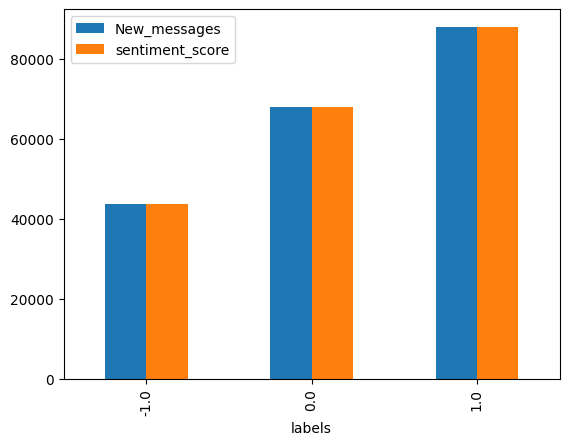

In [ ]:
# The distribution of sentiments
data.groupby('labels').count().plot(kind='bar')


In [ ]:
data['label'] = data['labels'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})


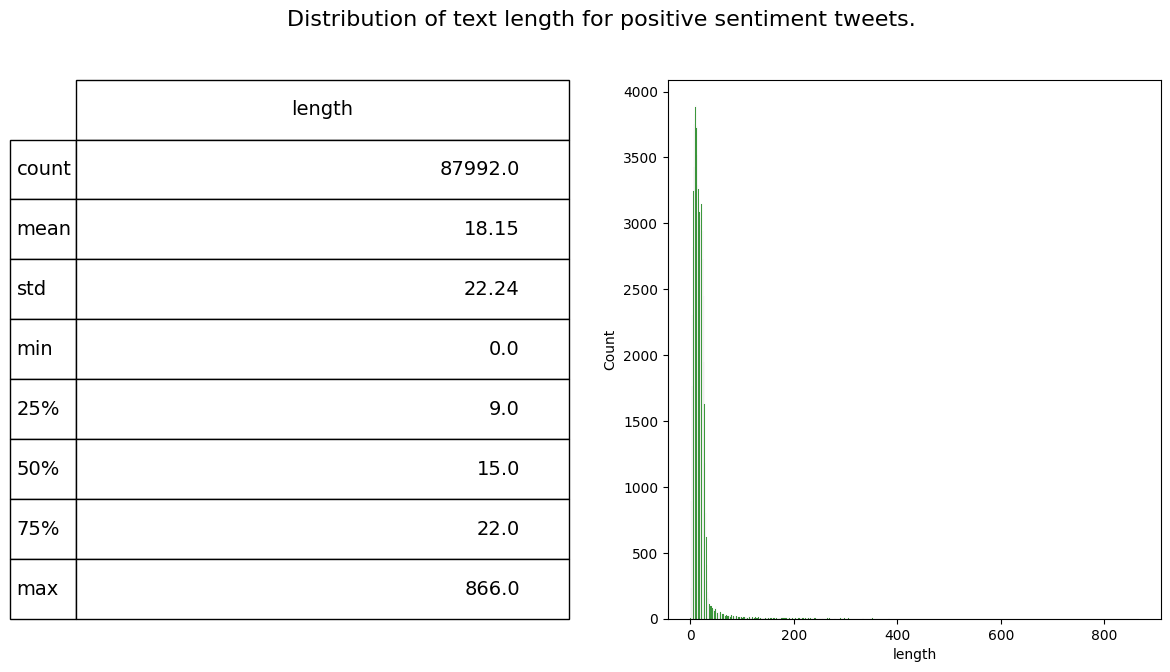

In [ ]:
#Plotting the distribution of text length for positive sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.New_messages.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Positive']['length'], ax=ax1,color='green')
describe = data.length[data.label=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

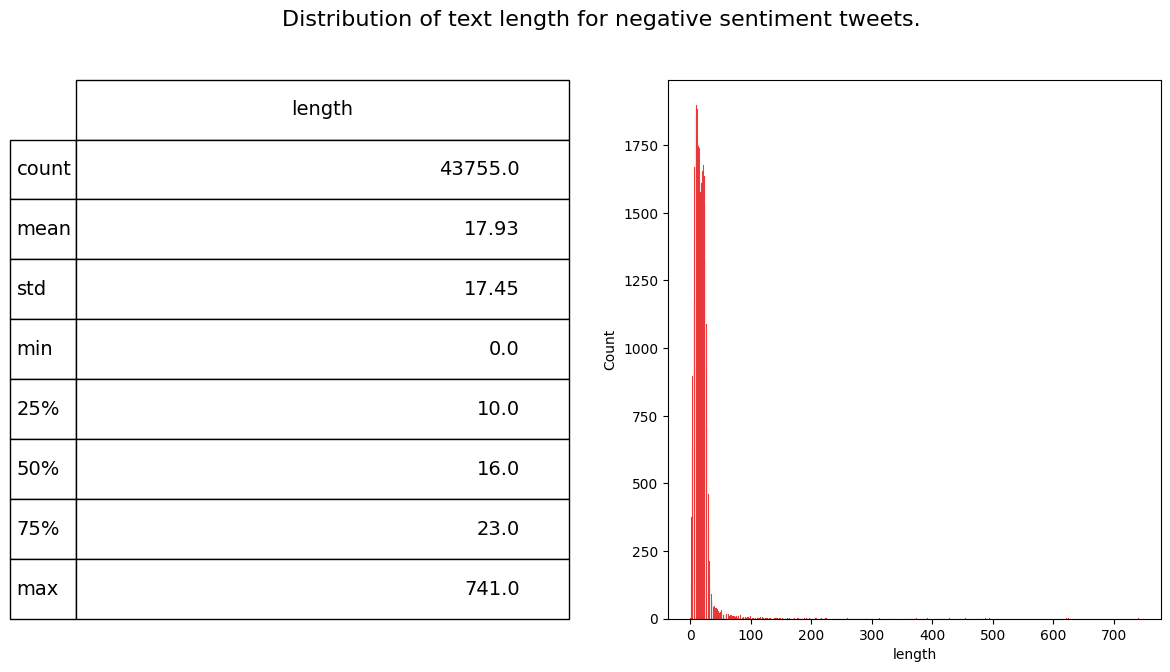

In [ ]:
#Plotting the distribution of text length for Negative sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.New_messages.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Negative']['length'], ax=ax1,color='red')
describe = data.length[data.label=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

plt.show()


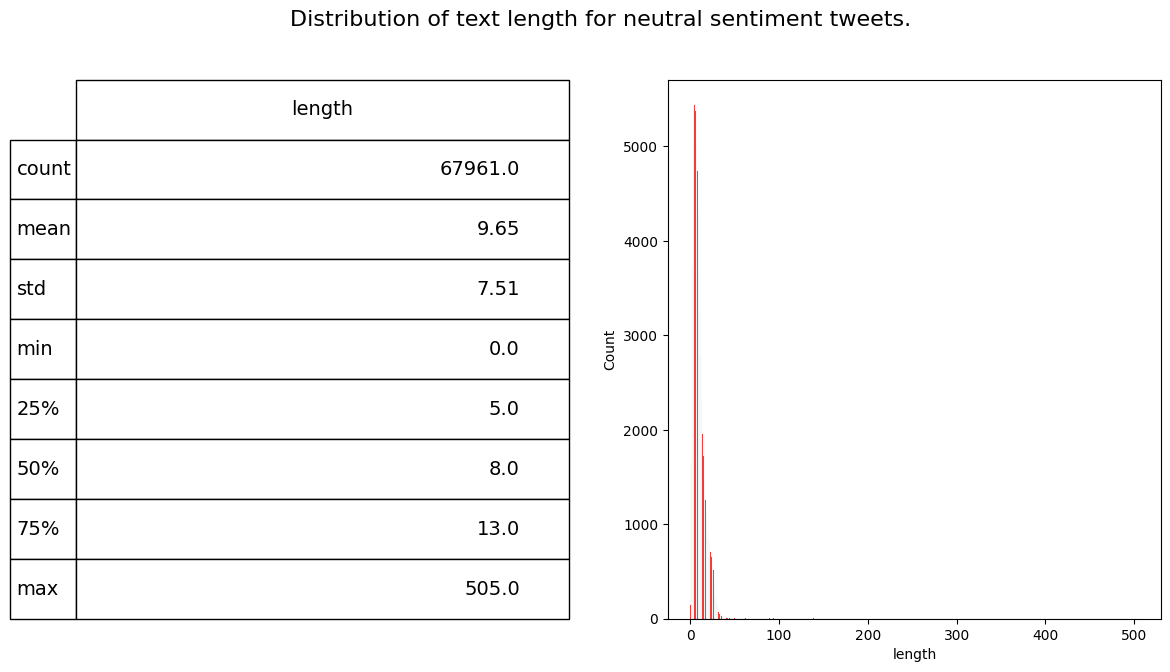

In [ ]:
#Plotting the distribution of text length for Neutral sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.New_messages.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Neutral']['length'], ax=ax1,color='red')
describe = data.length[data.label=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for neutral sentiment tweets.', fontsize=16)

plt.show()


In [ ]:
import plotly.express as px
fig = px.pie(data, names='label', title ='Pie chart of different sentiments of data')
fig.show()

In [ ]:
data.head()

,labels,New_messages,sentiment_score,label,length
0,-1.0,modi promise “minimum government maximum gover...,0.4939,Negative,21
1,0.0,talk nonsense continue drama vote modi,-0.4019,Neutral,6
2,1.0,say vote modi welcome bjp tell rahul main camp...,0.7096,Positive,13
3,1.0,ask supporters prefix chowkidar name modi grea...,0.4939,Positive,19
4,1.0,answer among powerful world leader today trump...,0.4215,Positive,10


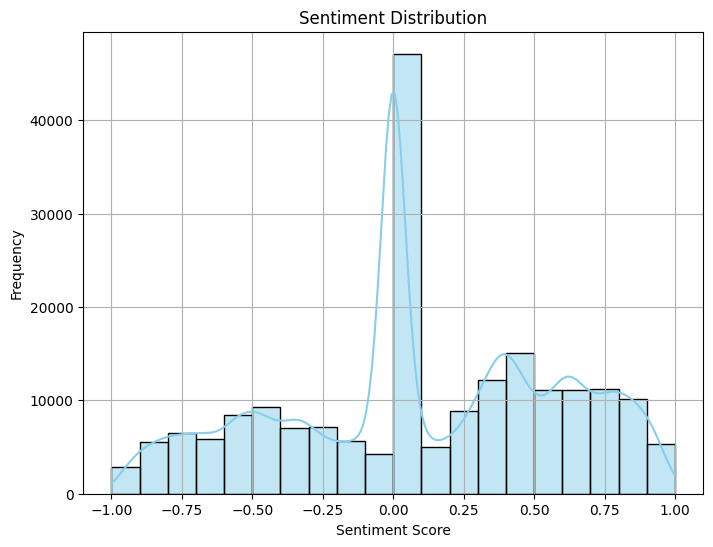

In [ ]:
# Visualize sentiment distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-52-f76c39074626>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




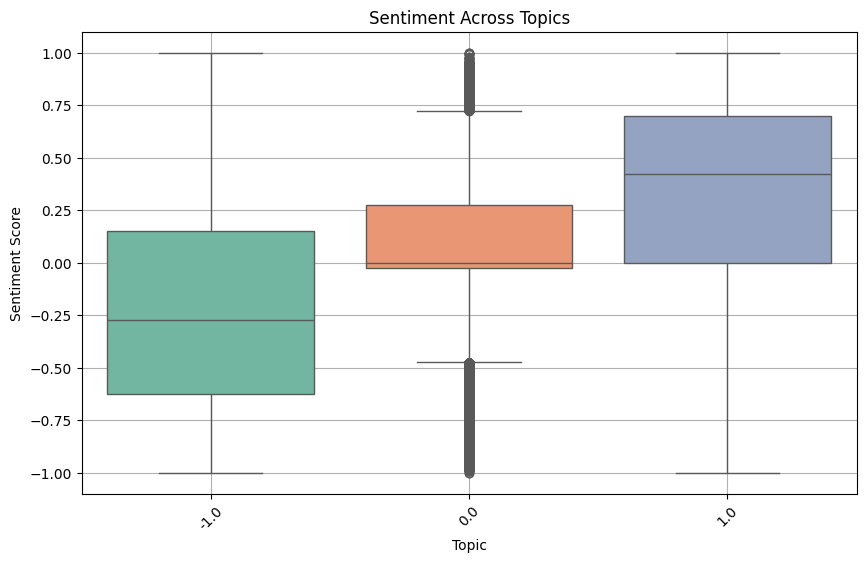

In [ ]:
# Compare sentiment across labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='labels', y='sentiment_score', data=data, palette='Set2')
plt.title('Sentiment Across Topics')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

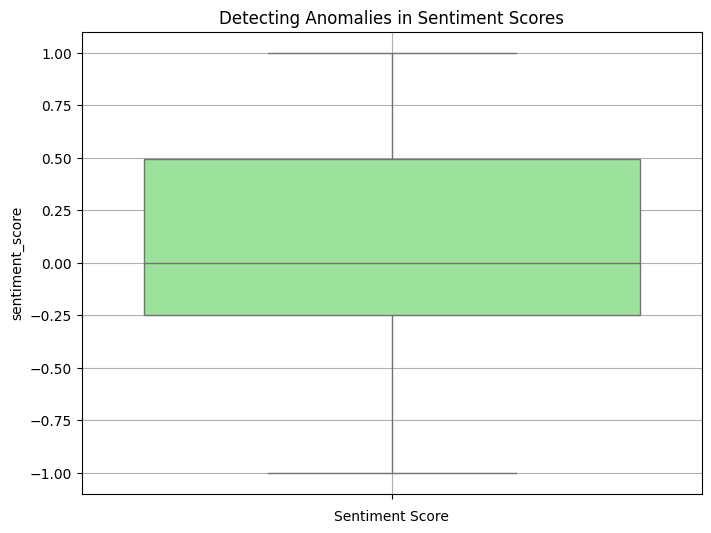

In [ ]:
# Detect anomalies or outliers in sentiment scores
plt.figure(figsize=(8, 6))
sns.boxplot(data['sentiment_score'], color='lightgreen')
plt.title('Detecting Anomalies in Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.grid(True)
plt.show()

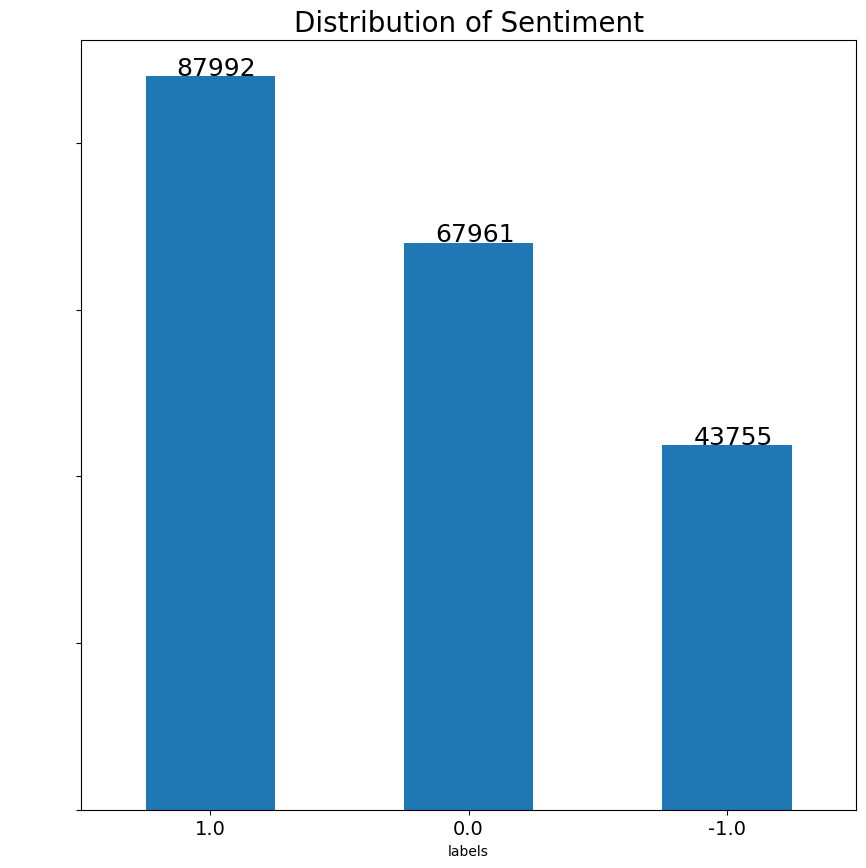

In [ ]:
#Graph of Stopwords
fig , ax = plt.subplots(figsize = (10,10))
ax = data['labels'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = data['labels'].value_counts().values[0], xy = (-0.13,88079), size = 18)
ax.annotate(text = data['labels'].value_counts().values[1], xy = (0.87,68253), size = 18)
ax.annotate(text = data['labels'].value_counts().values[2], xy = (1.87,43786), size = 18)

plt.show()

# Train & Test Split


In [ ]:
data.head()

,labels,New_messages,sentiment_score,label,length
0,-1.0,modi promise “minimum government maximum gover...,0.4939,Negative,21
1,0.0,talk nonsense continue drama vote modi,-0.4019,Neutral,6
2,1.0,say vote modi welcome bjp tell rahul main camp...,0.7096,Positive,13
3,1.0,ask supporters prefix chowkidar name modi grea...,0.4939,Positive,19
4,1.0,answer among powerful world leader today trump...,0.4215,Positive,10


In [ ]:
#Finding X and y
X = data['New_messages']
y = data['label']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
##Vectorize text data
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
data.head()

,labels,New_messages,sentiment_score,label,length
0,-1.0,modi promise “minimum government maximum gover...,0.4939,Negative,21
1,0.0,talk nonsense continue drama vote modi,-0.4019,Neutral,6
2,1.0,say vote modi welcome bjp tell rahul main camp...,0.7096,Positive,13
3,1.0,ask supporters prefix chowkidar name modi grea...,0.4939,Positive,19
4,1.0,answer among powerful world leader today trump...,0.4215,Positive,10


#Logistic Regression


In [ ]:

# Initialize logistic regression model
log_reg_model = LogisticRegression()

# Train the logistic regression model on the training data
log_reg_model.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
# Predict on the testing data
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)


In [ ]:
# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)


Logistic Regression Accuracy: 0.8660057082770016


In [ ]:
# Generate confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log_reg)


Logistic Regression Confusion Matrix:
[[3247  538  568]
 [ 131 6488  257]
 [ 432  750 7560]]


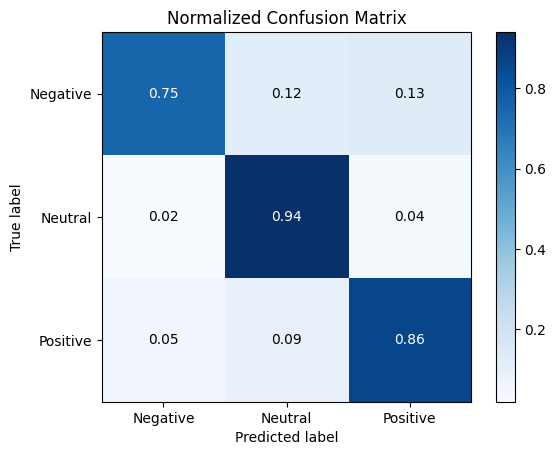

In [ ]:
# Plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log_reg, normalize=True)
plt.title("Normalized Confusion Matrix")
plt.show()


In [ ]:
report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Classification Report:")
print(report_log_reg)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.75      0.80      4353
     Neutral       0.83      0.94      0.89      6876
    Positive       0.90      0.86      0.88      8742

    accuracy                           0.87     19971
   macro avg       0.86      0.85      0.85     19971
weighted avg       0.87      0.87      0.86     19971



#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier model
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2)


# Train the Decision Tree Classifier model on the training data
dt_model.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred_dt = dt_model.predict(X_test_tfidf)


In [ ]:
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Classifier Confusion Matrix:")
print(conf_matrix_dt)


Decision Tree Classifier Accuracy: 0.4758900405588103
Decision Tree Classifier Confusion Matrix:
[[   2 1080 3271]
 [   0 2921 3955]
 [   3 2158 6581]]


In [ ]:
# Generate classification report
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classifier Classification Report:")
print(report_dt)


Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

    Negative       0.40      0.00      0.00      4353
     Neutral       0.47      0.42      0.45      6876
    Positive       0.48      0.75      0.58      8742

    accuracy                           0.48     19971
   macro avg       0.45      0.39      0.34     19971
weighted avg       0.46      0.48      0.41     19971



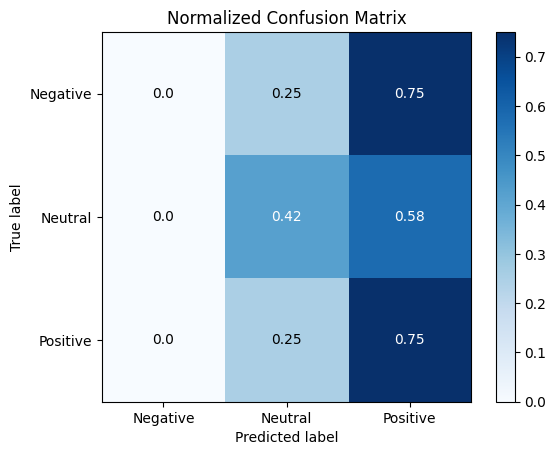

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
# Plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=True)
plt.title("Normalized Confusion Matrix")
plt.show()


#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the RandomForest Classifier model on the training data
rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(max_depth=10)

In [ ]:
# Predict on the testing data
y_pred_rf = rf_model.predict(X_test_tfidf)


In [ ]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForest Classifier Accuracy:", accuracy_rf)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("RandomForest Classifier Confusion Matrix:")
print(conf_matrix_rf)

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf)
print("RandomForest Classifier Classification Report:")
print(report_rf)

RandomForest Classifier Accuracy: 0.437734715337239
RandomForest Classifier Confusion Matrix:
[[   0    0 4353]
 [   0    0 6876]
 [   0    0 8742]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



RandomForest Classifier Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      4353
     Neutral       0.00      0.00      0.00      6876
    Positive       0.44      1.00      0.61      8742

    accuracy                           0.44     19971
   macro avg       0.15      0.33      0.20     19971
weighted avg       0.19      0.44      0.27     19971



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#KNeighborsClassifier

In [ ]:

# Initialize KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Train the KNeighborsClassifier model on the training data
knn_model.fit(X_train_tfidf, y_train)


In [ ]:
# Predict on the testing data
y_pred_knn = knn_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNeighborsClassifier Accuracy:", accuracy_knn)


In [ ]:
# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNeighborsClassifier Confusion Matrix:")
print(conf_matrix_knn)

# Generate classification report
report_knn = classification_report(y_test, y_pred_knn)
print("KNeighborsClassifier Classification Report:")
print(report_knn)


In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
# Plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, normalize=True)
plt.title("Normalized Confusion Matrix")
plt.show()


#Support Vector Machine (SVM)


In [ ]:

# Initialize SVM model
svm_model = SVC()

# Train the SVM model on the training data
svm_model.fit(X_train_tfidf, y_train)

In [ ]:
# Predict on the testing data
y_pred_svm = svm_model.predict(X_test_tfidf)


In [ ]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


In [ ]:
# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(conf_matrix_svm)


In [ ]:
# Generate classification report
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(report_svm)


# Save Model

In [ ]:
import joblib

# Save the trained model
Model = "logistic_regression_model.joblib"
joblib.dump(log_reg_model, Model)


['logistic_regression_model.joblib']

#Testing


In [ ]:
import random

# Load the saved model
loaded_model = joblib.load("logistic_regression_model.joblib")

# Sample a random instance from the test data
random_index = random.randint(0, len(X_test) - 1)
sample_instance = X_test.iloc[random_index]
# No need to reshape, keep as a string

# Transform the sample instance using the fitted TF-IDF vectorizer
sample_instance_tfidf = tfidf_vectorizer.transform([sample_instance]) # Pass as a list for single sample

# Use the loaded Logistic Regression model to predict the label for the sampled instance
predicted_label = loaded_model.predict(sample_instance_tfidf)[0]

# Get the actual label for the sampled instance
actual_label = y_test.iloc[random_index]

# Print the actual and predicted labels
print("Actual Label : ", actual_label)
print("Predicted Label : ", predicted_label)

Actual Label :  Neutral
Predicted Label :  Neutral
